Contrôle continu 1 : Compléments de math 2 L3 MIASHS

Groupe:
    1: Macé Gabriel 12010249
    2: Delattre Raphël 10150509

Sujet choisi : 4.Prédiction de la satisfaction de passagers d'avion

Etape préliminaire:

Nous avons choisi le jeu de données 4 car

I) Présentation générale du jeu de données:

In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
#df = pd.read_csv("https://raw.githubusercontent.com/SphRbtHyk/miashs_introduction_ml/main/exam/datasets/airline_satisfaction.csv")
df = pd.read_csv("airline_satisfaction.csv")
df.drop('Unnamed: 0', inplace = True, axis=1)
df.shape

(129880, 24)

1) Il y a 129880 individus et 24 variables dans le jeu de données

2)
Gender : Variable qualitative bianire : représante si l'individu est un homme ou une femme

Customer Type: Variable qualitative binaire, représente si le client est habitué à la compagnie ou non

Age: Variable quantitative représentant l'age de la personne

Type of Travel: Variable qualitative représentant le but de voyage (personnel ou professionel)

Class: Variable ordinale répresant la classe du voyage (Business, Eco, Eco Plus)

Flight distance: Variable quantitative, égale à la distance du vol

Inflight wifi service: Variable ordinale réprésentant une échelle de satisfaction du wifi lors du vol, de 0(inutilisable) à 5

Departure/Arrival time convenient: Variable ordinale représentant la satisfaction concernant le respect de l'heure d'arrivée et de départ (de 0 à 5)

Ease of Online booking: Variable ordinale représentant la satisfaction concernant la facilité de réservation en ligne du vol (de 0 à 5)

Gate location: Variable ordinale représentant la satisfaction concernant la localisation du terminal (de 1 à 5)

Food and drink: Variable ordinale représentant la satisfaction concernant la nourriture et les boissons (de 0 à 5)

Online boarding: Variable ordinale représentant la satisfaction concernant le check-in en ligne (de 0 à 5)

Seat comfort: Variable ordinale représentant la satisfaction concernant le confort des sièges (de 1 à 5)

Inflight entertainment: Variable ordinale représentant la satisfaction concernant le divertissement lors du vol (de 0 à 5)

On-board service: Variable ordinale représentant la satisfaction concernant la qualité du service à bord du vol (de 0 à 5)

Leg room service: Variable ordinale représentant la satisfaction concernant la place pour les jambes (de 0 à 5)

Baggage handling: Variable ordinale représentant la satisfaction concernant la gestion des bagages (de 1 à 5)

Check-in service: Variable ordinale représentant la satisfaction concernant le service de check-in (de 0 à 5)

Inflight service: Variable ordinale représentant la satisfaction concernant le service en vol(de 0 à 5)

Cleanliness: Variable ordinale représentant la satisfaction concernant la propreté (de 0 à 5)

Departure Delay in Minutes: variable quantitative égale au temps de retard du départ, en minutes

Arrival Delay in Minutes: variable quantitative égale au temps de retard à l'arrivée, en minutes

Satisfaction: variable qualitative binaire représentant la satisfaction du client(Satisfaction, neutral or dissatisfaction)

3) Toutes les variables nous paraissent interessante à évaluer, sauf l'id

In [5]:
ordinal = ["Departure/Arrival time convenient","Ease of Online booking","Gate location",
           "Food and drink","Online boarding","Seat comfort","Inflight entertainment","On-board service","Leg room service",
           "Baggage handling","Checkin service","Inflight service","Cleanliness"]
df["Note_totale"]=df["Inflight wifi service"]
for i in ordinal:
    df["Note_totale"]+=df[i]

In [6]:
ordinal += ["Note_totale", "Inflight wifi service"]

In [7]:
def tranche_age(x):
    if x<18: return 0
    if x< 30: return 1
    if x< 50: return 2
    return 3
df["tranche_age"]=df.Age.apply(lambda x: tranche_age(x))

In [8]:
df["retard_en_vol"]=df["Arrival Delay in Minutes"]-df["Departure Delay in Minutes"]
#si negatif : le vol à rattraper du retard

In [40]:
mask = df["Arrival Delay in Minutes"] <0
mask.value_counts()
#aucun vol arrive en avance

False    129880
Name: Arrival Delay in Minutes, dtype: int64

4) Nous avons créé trois variables:
Note_totale : variables ordinale : addition de toutes les notes
tranche_age : variable qualitative représentant les tranches d'ages
retard_en_vol : variable quantitative représentant le nombre de minutes gagnées ou perdues pendants le vol

In [9]:
target=["satisfaction"]
quantitative =["Age","Flight Distance","Arrival Delay in Minutes","Departure Delay in Minutes","retard_en_vol"]
ordinal+=["Class"]
qualitative=["Gender","Customer Type","Type of Travel","tranche_age"]

In [10]:
features=quantitative+qualitative+ordinal

In [47]:
df.describe(include='all')

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Note_totale,tranche_age,retard_en_vol
count,129880.000000,129880,129880,129880.000000,129880,129880,129880.000000,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880,129880.000000,129880.000000,129487.000000
unique,NaN,2,2,NaN,2,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
top,NaN,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied,NaN,NaN,NaN
freq,NaN,65899,106100,NaN,89693,62160,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,73452,NaN,NaN,NaN
mean,64940.500000,NaN,NaN,39.427957,NaN,NaN,1190.316392,2.728696,3.057599,2.756876,...,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129,NaN,45.377741,1.907415,0.447744
std,37493.270818,NaN,NaN,15.119360,NaN,NaN,997.452477,1.329340,1.526741,1.401740,...,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650,NaN,9.264191,0.890391,10.078293
min,1.000000,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,15.000000,0.000000,-54.000000
25%,32470.750000,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,NaN,39.000000,1.000000,-2.000000
50%,64940.500000,NaN,NaN,40.000000,NaN,NaN,844.000000,3.000000,3.000000,3.000000,...,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,NaN,46.000000,2.000000,0.000000
75%,97410.250000,NaN,NaN,51.000000,NaN,NaN,1744.000000,4.000000,4.000000,4.000000,...,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,NaN,52.000000,3.000000,0.000000


In [48]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Note_totale,tranche_age,retard_en_vol
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,4,4,5,5,25,18.0,neutral or dissatisfied,54,0,-7.0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,3,1,4,1,1,6.0,neutral or dissatisfied,32,1,5.0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,4,4,4,5,0,0.0,satisfied,52,1,0.0
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,3,1,4,2,11,9.0,neutral or dissatisfied,42,1,-2.0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,4,3,3,3,0,0.0,satisfied,49,3,0.0


In [49]:
for i in qualitative + ordinal :
    print(i, "\n",df[i].value_counts())

Gender 
 Female    65899
Male      63981
Name: Gender, dtype: int64
Customer Type 
 Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64
Type of Travel 
 Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64
tranche_age 
 2    55340
3    36181
1    28512
0     9847
Name: tranche_age, dtype: int64
Departure/Arrival time convenient 
 4    31880
5    27998
3    22378
2    21534
1    19409
0     6681
Name: Departure/Arrival time convenient, dtype: int64
Ease of Online booking 
 3    30393
2    30051
4    24444
1    21886
5    17424
0     5682
Name: Ease of Online booking, dtype: int64
Gate location 
 3    35717
4    30466
2    24296
1    21991
5    17409
0        1
Name: Gate location, dtype: int64
Food and drink 
 4    30563
5    27957
3    27794
2    27383
1    16051
0      132
Name: Food and drink, dtype: int64
Online boarding 
 4    38468
3    27117
5    26020
2    21934
1    13261
0     3080
Name: Online boarding, dty

II)Analyse univariée

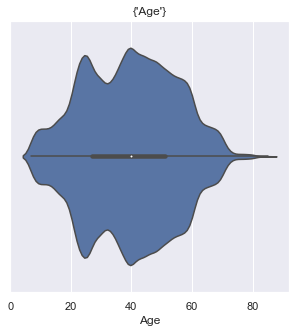

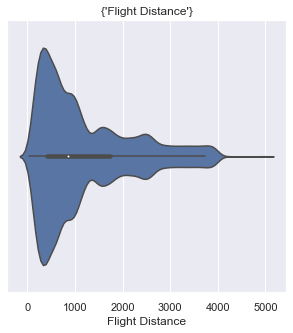

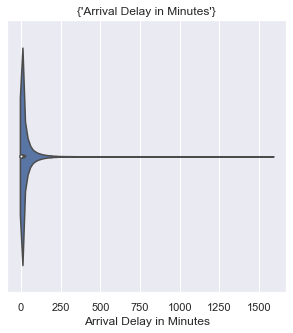

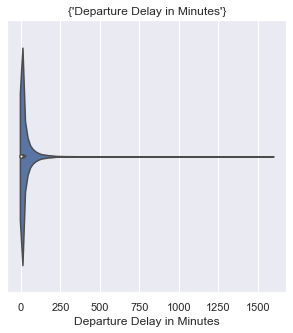

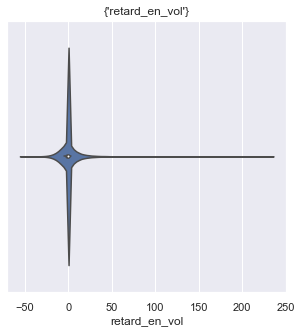

In [88]:
for i in df[quantitative]:
    sns.violinplot(data=df, x=i).set_title({i})
    plt.show()

In [66]:
for i in quantitative:
    print(i, " : ",max(df[i].value_counts()))


Age  :  3692
Flight Distance  :  841
Arrival Delay in Minutes  :  72753
Departure Delay in Minutes  :  73356
retard_en_vol  :  61058


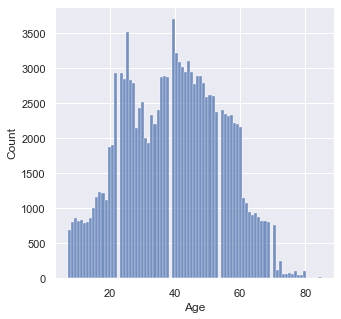

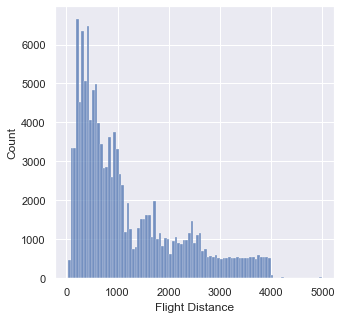

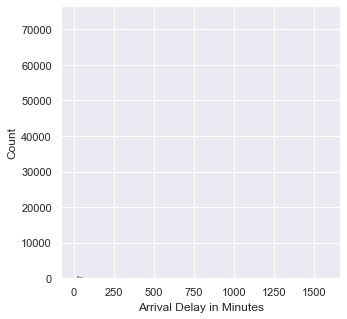

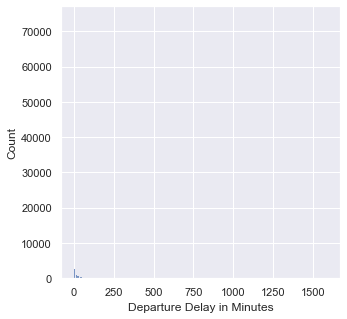

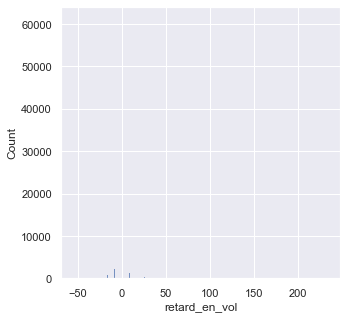

In [72]:
for i in quantitative:
    sns.histplot(data=df, x=i)
    #plt.axis([min(df[i])-10,max(df[i])+10,0,2000])#max(df[i].value_counts())+100])
    plt.show()

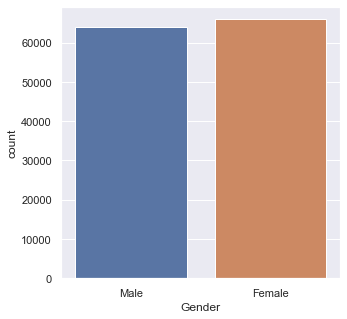

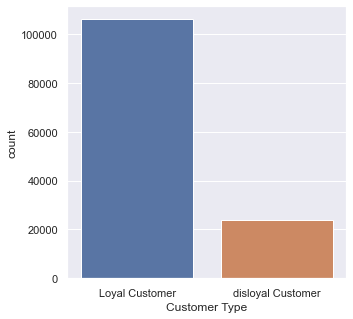

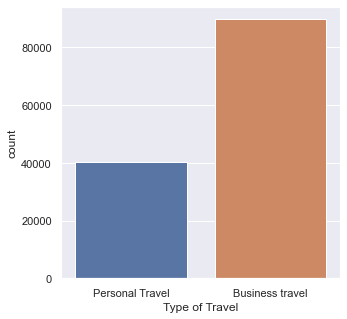

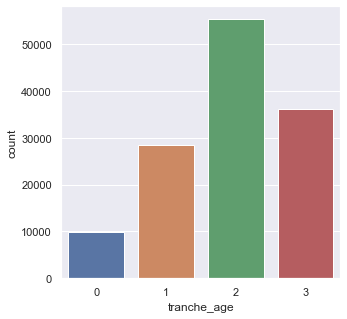

In [73]:
for i in qualitative:
    sns.countplot(data=df, x=i)
    plt.show() 

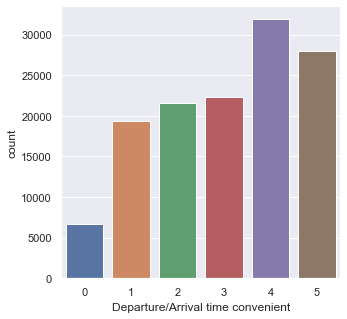

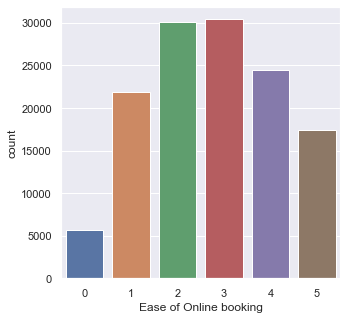

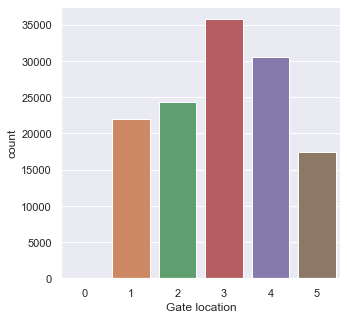

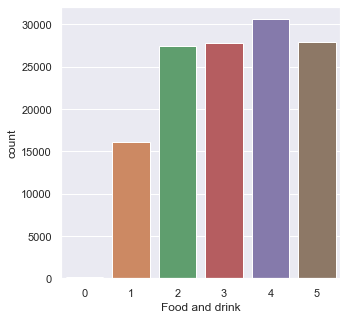

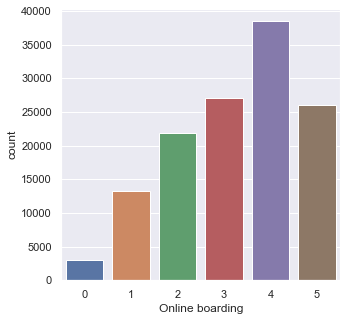

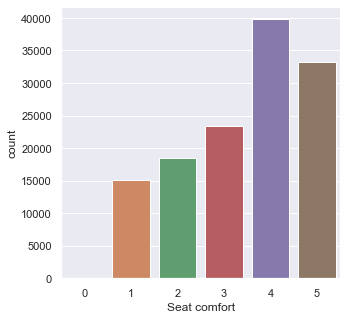

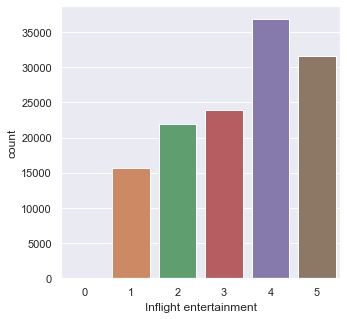

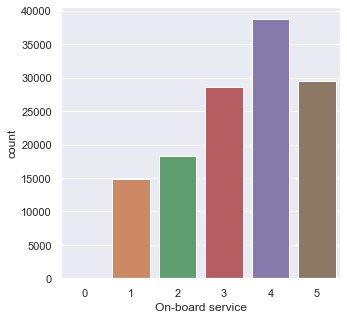

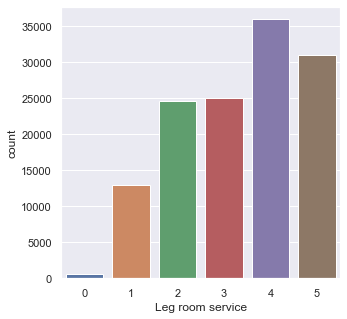

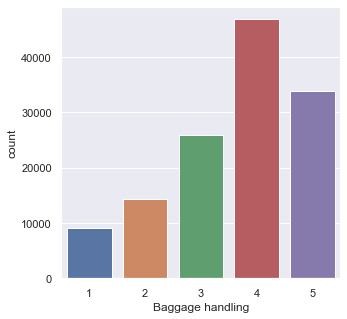

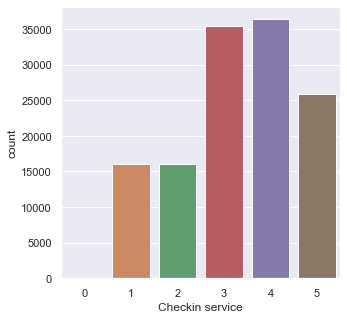

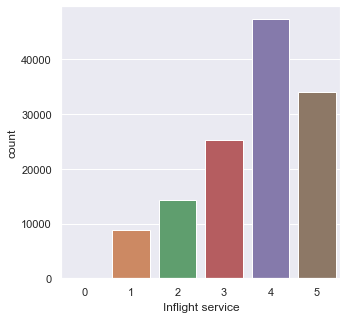

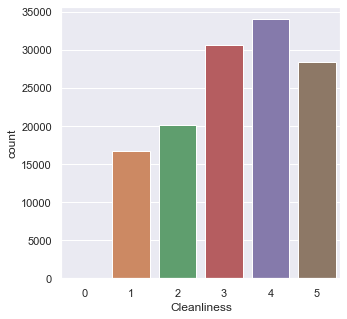

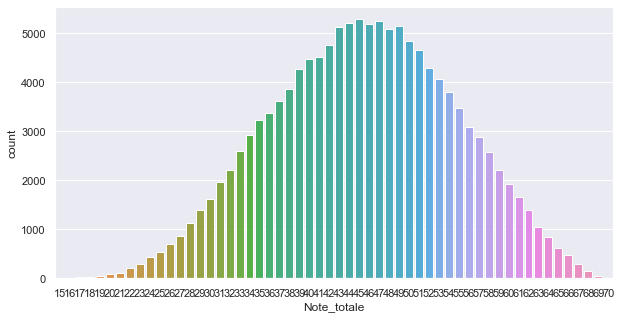

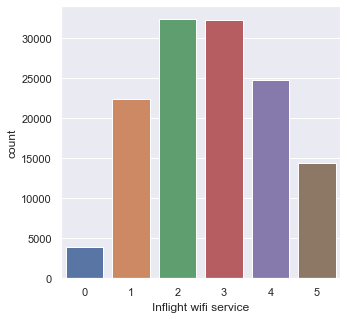

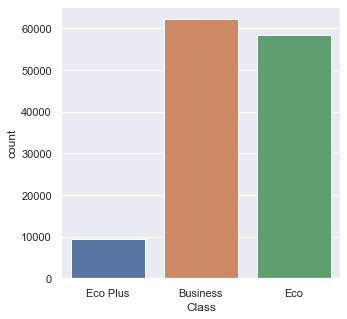

In [69]:
for i in ordinal:
    #if i == "Note_totale":sns.set(rc={'figure.figsize':(10,5)}), pour changer la taille de l'image
    sns.countplot(data=df, x=i)
    plt.show() 
    sns.set(rc={'figure.figsize':(5,5)})

1) Le delai d'arrivée semble suivre la même loi que celui de départ
Il y a beaucoup plus de Loyal custome que de disloyal customer
Il y a plus de personne voyageant pour le travail que pour des raisons personnels
Pour les notes de statisfactions, elles semblent à peu près semblables, c'est à dire plus importantes pour les notes hautes que basses
La note totale suit une loi normale de moyenne environ 50
Il y a à peu près autant d'eco que de bussines, et peu de eco plus

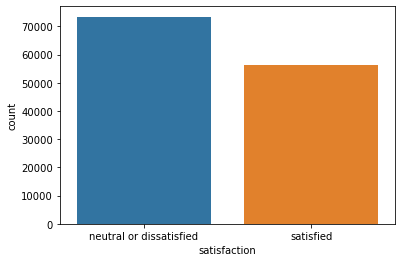

In [22]:
for i in target:
    sns.countplot(data=df, x=i)
    plt.show() 

In [13]:
df[target].value_counts()

satisfaction           
neutral or dissatisfied    73452
satisfied                  56428
dtype: int64

2)
Il y a un plus de neutre ou non satisfaits que de satisfaits mais la variable satisfaction ne semble pas désequilibrée
Si nous sommes dans un cas de classification équilibrée 

In [12]:
for i in features:
    print(f"Nombre de client sans {i}: {df[df[i].isna()].shape[0]}")

Nombre de client sans Age: 0
Nombre de client sans Flight Distance: 0
Nombre de client sans Arrival Delay in Minutes: 0
Nombre de client sans Departure Delay in Minutes: 0
Nombre de client sans retard_en_vol: 0
Nombre de client sans Gender: 0
Nombre de client sans Customer Type: 0
Nombre de client sans Type of Travel: 0
Nombre de client sans tranche_age: 0
Nombre de client sans Departure/Arrival time convenient: 0
Nombre de client sans Ease of Online booking: 0
Nombre de client sans Gate location: 0
Nombre de client sans Food and drink: 0
Nombre de client sans Online boarding: 0
Nombre de client sans Seat comfort: 0
Nombre de client sans Inflight entertainment: 0
Nombre de client sans On-board service: 0
Nombre de client sans Leg room service: 0
Nombre de client sans Baggage handling: 0
Nombre de client sans Checkin service: 0
Nombre de client sans Inflight service: 0
Nombre de client sans Cleanliness: 0
Nombre de client sans Note_totale: 0
Nombre de client sans Inflight wifi service: 

In [104]:
df.describe(include='all')

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Note_totale,tranche_age,retard_en_vol
count,129880.000000,129880,129880,129880.000000,129880,129880,129880.000000,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880,129880.000000,129880.000000,129487.000000
unique,NaN,2,2,NaN,2,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
top,NaN,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,neutral or dissatisfied,NaN,NaN,NaN
freq,NaN,65899,106100,NaN,89693,62160,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,73452,NaN,NaN,NaN
mean,64940.500000,NaN,NaN,39.427957,NaN,NaN,1190.316392,2.728696,3.057599,2.756876,...,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129,NaN,45.377741,1.907415,0.447744
std,37493.270818,NaN,NaN,15.119360,NaN,NaN,997.452477,1.329340,1.526741,1.401740,...,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650,NaN,9.264191,0.890391,10.078293
min,1.000000,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,15.000000,0.000000,-54.000000
25%,32470.750000,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,NaN,39.000000,1.000000,-2.000000
50%,64940.500000,NaN,NaN,40.000000,NaN,NaN,844.000000,3.000000,3.000000,3.000000,...,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,NaN,46.000000,2.000000,0.000000
75%,97410.250000,NaN,NaN,51.000000,NaN,NaN,1744.000000,4.000000,4.000000,4.000000,...,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,NaN,52.000000,3.000000,0.000000


Il y a des données manquantes seulement dans "Arrival Delay in Minutes" et donc dans "retard_en_vol", il y en a 393
Ce sont des variables quantitatives on peut les remplacer par la médiane

In [11]:
for variable in quantitative:
    df[variable].fillna(df[variable].mean(), inplace=True)

In [45]:
df.describe(include='all')

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Note_totale,tranche_age,retard_en_vol
count,129880.000000,129880,129880,129880.000000,129880,129880,129880.000000,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
unique,NaN,2,2,NaN,2,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,65899,106100,NaN,89693,62160,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,64940.500000,NaN,NaN,39.427957,NaN,NaN,1190.316392,2.728696,3.057599,2.756876,...,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129,0.434463,45.377741,1.907415,0.447744
std,37493.270818,NaN,NaN,15.119360,NaN,NaN,997.452477,1.329340,1.526741,1.401740,...,1.180025,1.266185,1.176669,1.313682,38.071126,38.407410,0.495688,9.264191,0.890391,10.063033
min,1.000000,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,-54.000000
25%,32470.750000,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,39.000000,1.000000,-2.000000
50%,64940.500000,NaN,NaN,40.000000,NaN,NaN,844.000000,3.000000,3.000000,3.000000,...,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,46.000000,2.000000,0.000000
75%,97410.250000,NaN,NaN,51.000000,NaN,NaN,1744.000000,4.000000,4.000000,4.000000,...,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000,52.000000,3.000000,0.000000


3)Analyse multivariée

In [13]:
def binaire(x):
    if x == "satisfied": return 1
    return 0
df["satisfaction"]=df.satisfaction.apply(lambda x: binaire(x))

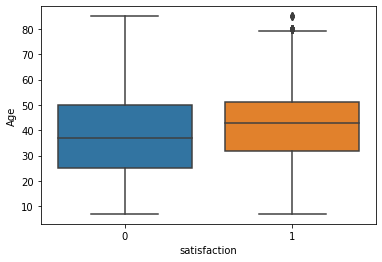

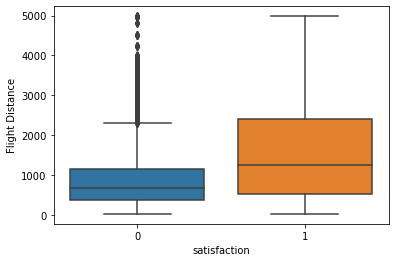

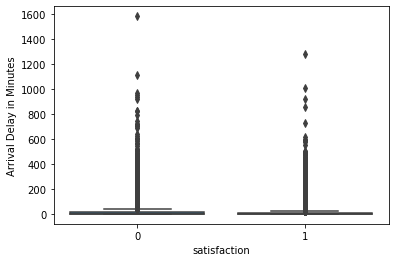

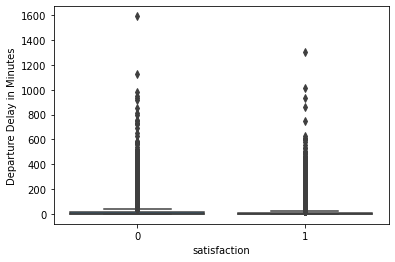

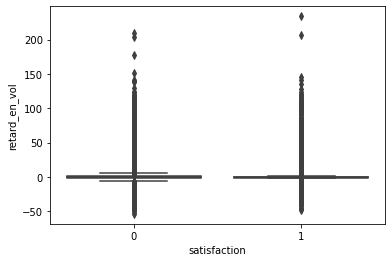

In [27]:
for i in quantitative:
    sns.boxplot(data=df, x="satisfaction", y=i)
    plt.show()

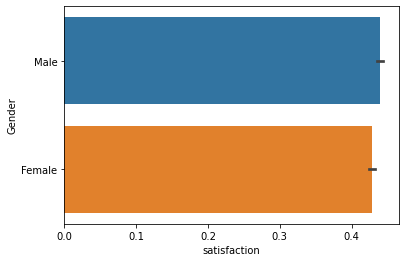

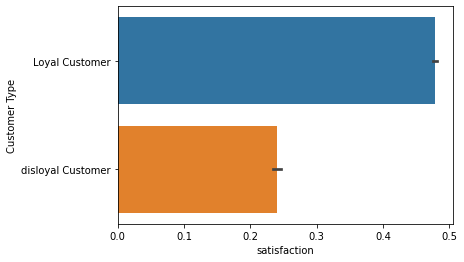

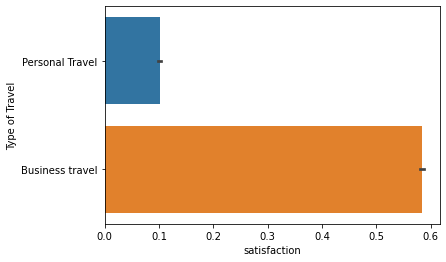

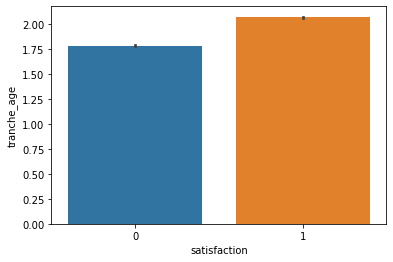

In [28]:
for i in qualitative:
    sns.barplot(data=df, x="satisfaction", y=i)
    plt.show()

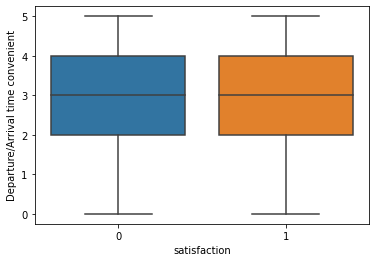

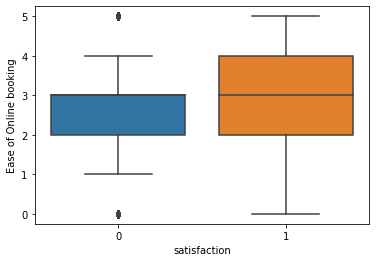

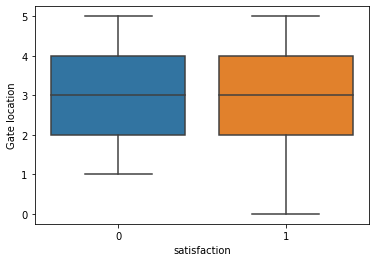

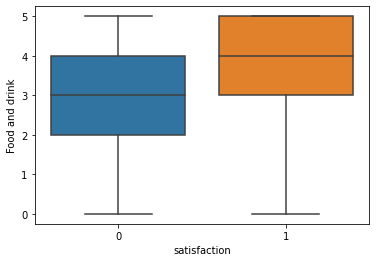

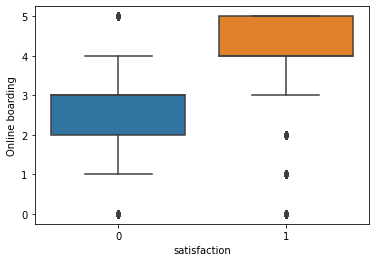

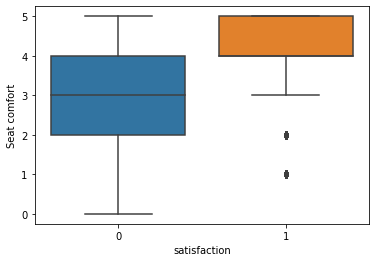

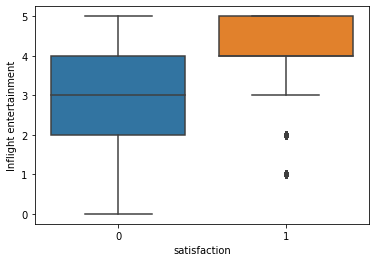

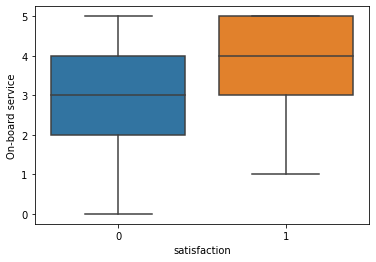

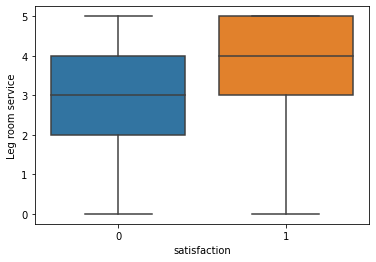

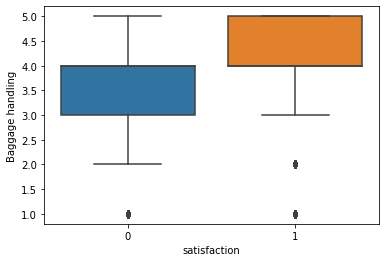

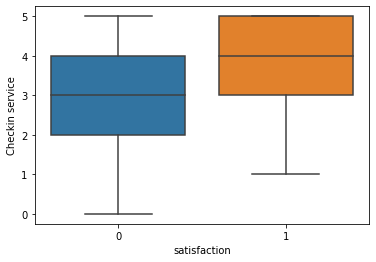

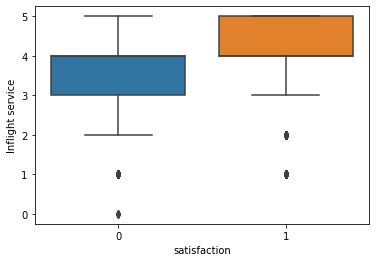

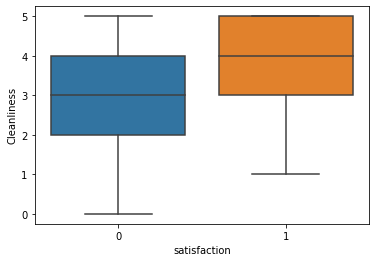

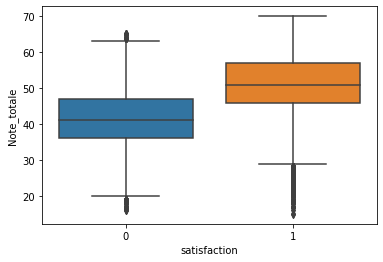

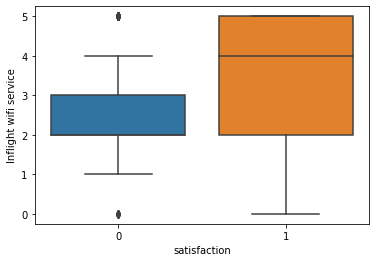

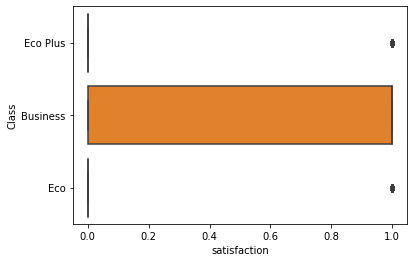

In [29]:
for i in ordinal:
    sns.boxplot(data=df, x="satisfaction", y=i)
    plt.show()

In [30]:
df[quantitative+target].corr()

,Age,Flight Distance,Arrival Delay in Minutes,Departure Delay in Minutes,retard_en_vol,satisfaction
Age,1.000000,0.099459,-0.011229,-0.009041,-0.008053,0.134091
Flight Distance,0.099459,1.000000,-0.001932,0.002402,-0.014861,0.298085
Arrival Delay in Minutes,-0.011229,-0.001932,1.000000,0.960329,0.183502,-0.058187
Departure Delay in Minutes,-0.009041,0.002402,0.960329,1.000000,-0.079199,-0.050740
retard_en_vol,-0.008053,-0.014861,0.183502,-0.079199,1.000000,-0.030298
satisfaction,0.134091,0.298085,-0.058187,-0.050740,-0.030298,1.000000


In [31]:
df[ordinal+target].corr()

,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Note_totale,Inflight wifi service,satisfaction
Departure/Arrival time convenient,1.000000,0.437620,0.447510,0.000687,0.072287,0.008666,-0.008380,0.067297,0.010617,0.070833,0.091132,0.072195,0.009862,0.395837,0.344915,-0.054270
Ease of Online booking,0.437620,1.000000,0.460041,0.030514,0.404866,0.028561,0.046564,0.039064,0.109450,0.039148,0.008819,0.035373,0.015125,0.497475,0.714807,0.168877
Gate location,0.447510,0.460041,1.000000,-0.002872,0.002756,0.002788,0.002741,-0.029019,-0.005181,0.000972,-0.039353,0.000310,-0.005918,0.319905,0.338573,-0.002793
Food and drink,0.000687,0.030514,-0.002872,1.000000,0.233500,0.575846,0.623461,0.057404,0.033173,0.035321,0.085198,0.035210,0.658054,0.499307,0.132214,0.211340
Online boarding,0.072287,0.404866,0.002756,0.233500,1.000000,0.419253,0.283922,0.154242,0.123225,0.083541,0.204238,0.074058,0.329377,0.552707,0.457445,0.501749
Seat comfort,0.008666,0.028561,0.002788,0.575846,0.419253,1.000000,0.611837,0.130545,0.104272,0.074620,0.189979,0.068842,0.679613,0.571413,0.121513,0.348829
Inflight entertainment,-0.008380,0.046564,0.002741,0.623461,0.283922,0.611837,1.000000,0.418574,0.300397,0.379123,0.119554,0.406094,0.692511,0.713132,0.207802,0.398234
On-board service,0.067297,0.039064,-0.029019,0.057404,0.154242,0.130545,0.418574,1.000000,0.357721,0.520296,0.244619,0.551569,0.122084,0.516631,0.119928,0.322205
Leg room service,0.010617,0.109450,-0.005181,0.033173,0.123225,0.104272,0.300397,0.357721,1.000000,0.371455,0.152693,0.369569,0.096695,0.442048,0.160317,0.312424
Baggage handling,0.070833,0.039148,0.000972,0.035321,0.083541,0.074620,0.379123,0.520296,0.371455,1.000000,0.234503,0.629237,0.097071,0.495649,0.120376,0.248680


2) Graphiquement les variables qui semblent être importantes sont:
La longueur du vol : plus c'est long, plus il y a satisfaction, le type de client : les loyaux sont plus satisfaits, le type de voyage : les gens qui voyagent pour le travail sont plus satisfaits
Les voyageurs en business semblent beaucoup plus satisfaits
En ce qui concerne les variables de satifactions spécifiques : les plus importantes semblent être "online boarding", "inflight service" et la note totale. Pour la plus part si il y une note inferieur à 3 il est très probable que le client ne soit pas satisfait

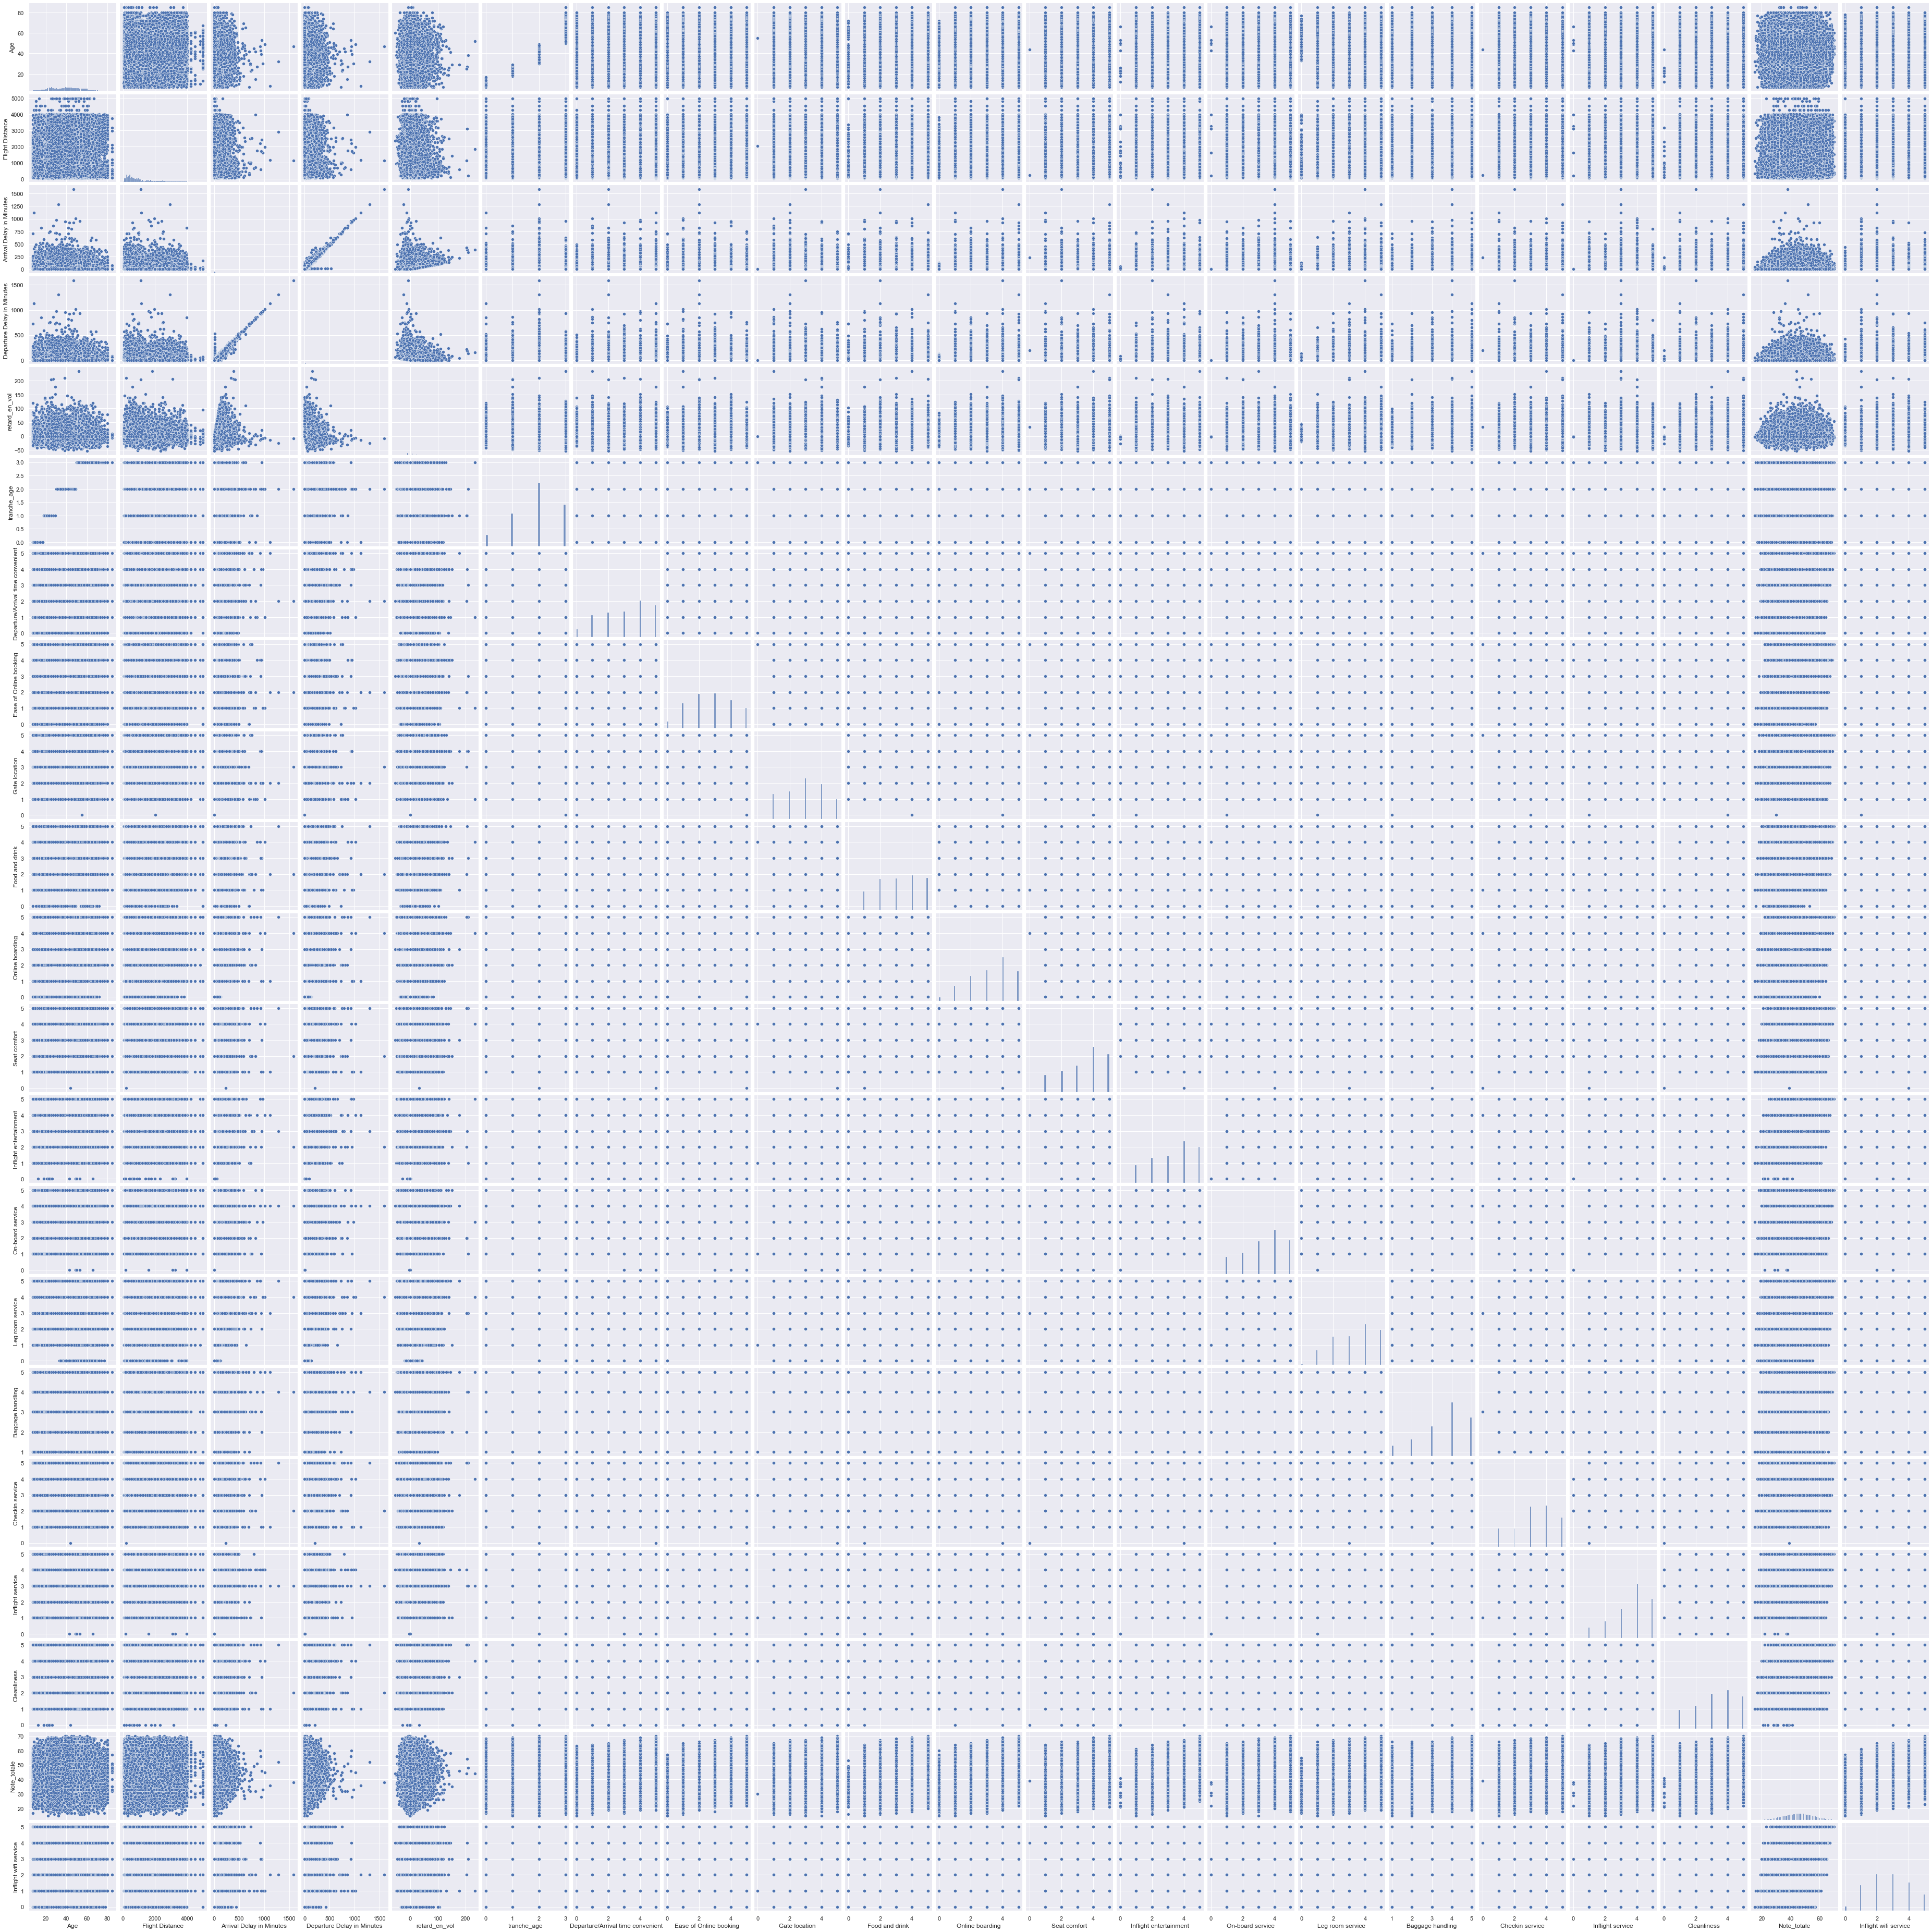

In [109]:
sns.pairplot(df[features+target])

4 Conclusion et suggestions pour les prochaines étapes

1) Les nouvelles variables :
tranche_age : nous a permis de voir que les personnes jeunes sont moins satisfaites mais n'est pas très pertinente
La note totale semble être très pertinente pour prédire la satisfaction
retard_en_vol ne semble pas pertinent du tout, elle peut être supprimée

2) On peut supprimer le sexe, et les variables représentant le retard

3) Le recall devra être proche de un pour éviter au maximum les faux négatifs
Quel est le but? Que faire de la prédiction

Apprentissage supervisé : 

In [14]:
from sklearn.dummy import DummyClassifier
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Note_totale,tranche_age,retard_en_vol
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,4,4,5,5,25,18.0,0,54,0,-7.0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,3,1,4,1,1,6.0,0,32,1,5.0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,4,4,4,5,0,0.0,1,52,1,0.0
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,3,1,4,2,11,9.0,0,42,1,-2.0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,4,3,3,3,0,0.0,1,49,3,0.0


In [15]:
#changement types de données
df2 =pd.DataFrame(df)
def sexe(x):
    if x == "Female": return 0
    return 1
def type_cus(x):
    if x == "Loyal Customer": return 0
    return 1
def type_travel(x):
    if x == "Personal Travel": return 0
    return 1
def classe(x):
#binaire : business ou eco car business ++ satisfait
    if x == "Business": return 1
    return 0

df2["Gender"]=df2.Gender.apply(lambda x: sexe(x))
df2["Customer Type"]=df2["Customer Type"].apply(lambda x: type_cus(x))
df2["Class"]=df2["Class"].apply(lambda x: classe(x))
df2["Type of Travel"]=df2["Type of Travel"].apply(lambda x: type_travel(x))

#def target_to_binary(x):
#    if x == "satisfied": return 0
#    return 1
#df2["satisfaction"]=df2["satisfaction"].apply(lambda x: target_to_binary(x))

In [43]:
df3=df2.sample(n=50000)

In [44]:
y = df3.satisfaction.values

In [45]:
print(y)

[1 0 0 ... 1 0 1]


In [46]:
X = df3[features].values

In [47]:
df3.satisfaction.value_counts()

0    28189
1    21811
Name: satisfaction, dtype: int64

In [48]:
#séparer les données en entrainement et test:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

In [50]:
accuracy_train_man=[]
recall_score_man=[]
precision_score_man=[]
for i in range(1,12,2):
    knn_train = KNeighborsClassifier(n_neighbors= i, metric = "manhattan")
    knn_train.fit(X_train,y_train)
    prediction_knn_test = knn_train.predict(X_test)
    accuracy_train_man.append(accuracy_score(y_test,prediction_knn_test))
    recall_score_man.append(recall_score(y_test,prediction_knn_test))
    precision_score_man.append(precision_score(y_test,prediction_knn_test))

C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [51]:
accuracy_train_euc = []
recall_score_euc = []
precision_score_euc = []
for i in range(1,12,2):
    knn_train = KNeighborsClassifier(n_neighbors= i,p=2)
    knn_train.fit(X_train,y_train)
    prediction_knn_test = knn_train.predict(X_test)
    accuracy_train_euc.append(accuracy_score(y_test,prediction_knn_test))
    recall_score_euc.append(recall_score(y_test,prediction_knn_test))
    precision_score_euc.append(precision_score(y_test,prediction_knn_test))

C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

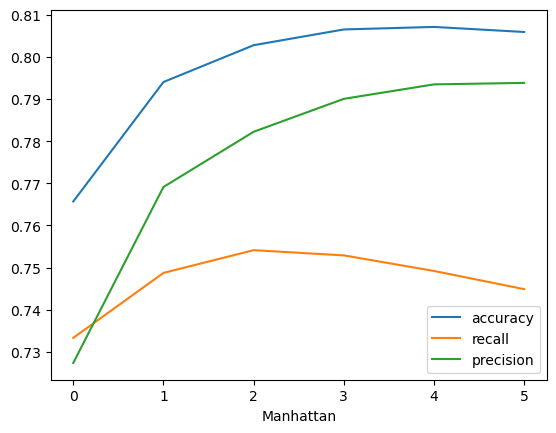

'\nplt.plot(accuracy_train_euc, label="accuracy")\nplt.plot(recall_score_euc, label="recall")\nplt.plot(precision_score_euc, label="precision")\nplt.legend()\nplt.xlabel("Manhattan")\nplt.show()'

In [52]:
plt.plot(accuracy_train_man, label="accuracy")
plt.plot(recall_score_man, label="recall")
plt.plot(precision_score_man, label="precision")
plt.legend()
plt.xlabel("Manhattan")
plt.show()
"""
plt.plot(accuracy_train_euc, label="accuracy")
plt.plot(recall_score_euc, label="recall")
plt.plot(precision_score_euc, label="precision")
plt.legend()
plt.xlabel("Manhattan")
plt.show()"""

mieux semble etre 5

In [53]:
knn_final = KNeighborsClassifier(n_neighbors=5 ,p=1)
knn_final.fit(X,y)
prediction_knn_final = knn_final.predict(X)
print("accuracy = ", accuracy_score(y,prediction_knn_final))
print("recall = ", recall_score(y,prediction_knn_final))
print("precision = ",precision_score(y,prediction_knn_final))

C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


accuracy =  0.87158
recall =  0.8250424097932236
precision =  0.8735436893203884


Cross Validation

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
cross_val_accuracy_man = []
cross_val_allacc_man = []
cross_val_precision_man = []
cross_val_allpre_man = []
for i in range(1,10,2):
    cross_val_accuracy = cross_val_score(estimator = KNeighborsClassifier(n_neighbors = i, p=1),X=X,y=y,cv=10,scoring="accuracy")
    cross_val_precision = cross_val_score(estimator = KNeighborsClassifier(n_neighbors = i,p=1),X=X,y=y,cv=10,scoring="precision")
    cross_val_accuracy_man.append(np.median(cross_val_accuracy))
    cross_val_allacc_man.append(cross_val_accuracy)
    cross_val_precision_man.append(np.median(cross_val_precision))
    cross_val_allpre_man.append(cross_val_precision)
    
    

C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [56]:
for i in cross_val_accuracy_man:
    print(i)
print("\n")
for j in cross_val_precision_man:
    print(j)

0.7712
0.7978000000000001
0.8056000000000001
0.8089
0.8087


0.7378050315256925
0.7827530608006568
0.797837141360475
0.8044651772983236
0.802565325948759


In [57]:
cross_val_accuracy_euc = []
cross_val_allacc_euc = []
cross_val_precision_euc = []
cross_val_allpre_euc = []
for i in range(1,10,2):
    print(i)
    cross_val_accuracy = cross_val_score(estimator = KNeighborsClassifier(n_neighbors = i, p=2),X=X,y=y,cv=10,scoring="accuracy")
    cross_val_precision = cross_val_score(estimator = KNeighborsClassifier(n_neighbors = i,p=2),X=X,y=y,cv=10,scoring="precision")
    cross_val_accuracy_euc.append(np.median(cross_val_accuracy))
    cross_val_allacc_euc.append(cross_val_accuracy)
    cross_val_precision_euc.append(np.median(cross_val_precision))
    cross_val_allpre_euc.append(cross_val_precision)

1


C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

3


C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

5


C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

7


C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

9


C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\33750\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [58]:
for i in cross_val_accuracy_euc:
    print(i)
print("\n")
for j in cross_val_precision_euc:
    print(j)

0.7173
0.7411
0.7509
0.7532000000000001
0.7551


0.6815025472817363
0.7173008678593349
0.7349493109828367
0.7409023701284372
0.7442949436350451


In [ ]:
Le mieux semble être distance de manhattan et k = 7, avec la cross-validation et sans preprocessing